# Visualizing the Newton-Raphson solution

This notebook gives a short example the NRLF method and tries to visualize the iterations.

In [2]:
import numpy as np

The Newton-Raphson method is an iterative numerical technique used to find approximate solutions to equations of the form \( f(x) = 0 \). Starting from an initial guess \( x_0 \), the method updates the solution using:

\[
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
\]

This process is repeated until the solution converges. The method is widely used due to its fast convergence when the initial guess is close to the actual root. In power systems, it is commonly applied to solve nonlinear equations such as power flow problems.

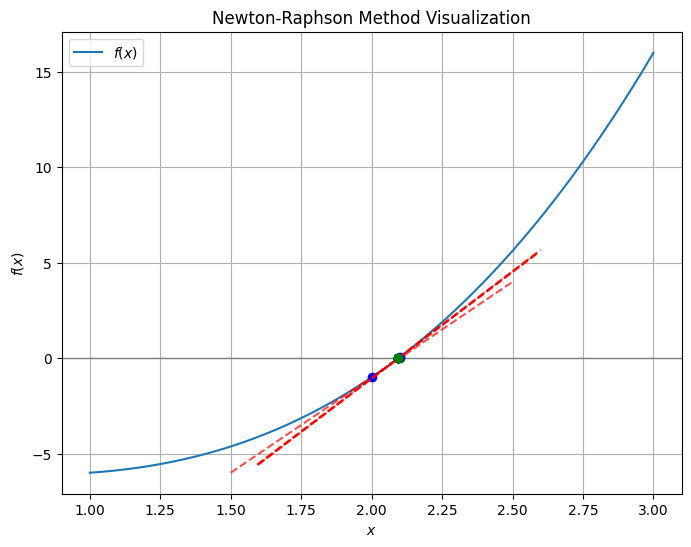

In [3]:
import matplotlib.pyplot as plt

# Define the function and its derivative
def f(x):
    return x**3 - 2*x - 5

def df(x):
    return 3*x**2 - 2

# Newton-Raphson iteration
x0 = 2.0
iterations = [x0]
for _ in range(5):
    x1 = x0 - f(x0)/df(x0)
    iterations.append(x1)
    x0 = x1

# Prepare data for visualization
x_vals = np.linspace(1, 3, 400)
y_vals = f(x_vals)

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label='$f(x)$')
plt.axhline(0, color='gray', lw=1)

# Visualize each iteration
for i in range(len(iterations)-1):
    x_n = iterations[i]
    y_n = f(x_n)
    x_next = iterations[i+1]
    # Draw tangent
    slope = df(x_n)
    tangent_x = np.linspace(x_n-0.5, x_n+0.5, 10)
    tangent_y = f(x_n) + slope*(tangent_x - x_n)
    plt.plot(tangent_x, tangent_y, 'r--', alpha=0.7)
    # Draw vertical drop to x-axis
    plt.plot([x_n, x_next], [y_n, 0], 'k:', alpha=0.7)
    # Mark points
    plt.plot(x_n, y_n, 'bo')
    plt.plot(x_next, 0, 'go')

plt.title('Newton-Raphson Method Visualization')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.grid(True)
plt.show()